In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('weather_data.csv', encoding='utf-8', skipinitialspace=True)
df.columns = df.columns.str.strip()

print(df.head().to_string(index=False))

 Дата  Дневная температура  Ночная температура День недели       Погодные условия
 1.01                    5                  -2 понедельник            Малооблачно
 2.01                    5                  -2     вторник Облачно с прояснениями
 3.01                    1                  -5       среда Облачно с прояснениями
 4.01                    2                  -3     четверг                   Ясно
 5.01                    6                   0     пятница               Пасмурно


In [61]:
df['Средняя температура'] = df[['Дневная температура', 'Ночная температура']].mean(axis=1)

coldest_day = df[df['Средняя температура'] == df['Средняя температура'].min()]
hottest_day = df[df['Средняя температура'] == df['Средняя температура'].max()]

print("Наиболее холодный день:")
print(coldest_day[['Дата', 'Дневная температура', 'Ночная температура', 'Средняя температура']].to_string(index=False))
print("\nНаиболее жаркий день:")
print(hottest_day[['Дата', 'Дневная температура', 'Ночная температура', 'Средняя температура']].to_string(index=False))

Наиболее холодный день:
 Дата  Дневная температура  Ночная температура  Средняя температура
28.01                  -12                 -16                -14.0

Наиболее жаркий день:
 Дата  Дневная температура  Ночная температура  Средняя температура
11.01                    5                   2                  3.5
12.01                    6                   1                  3.5


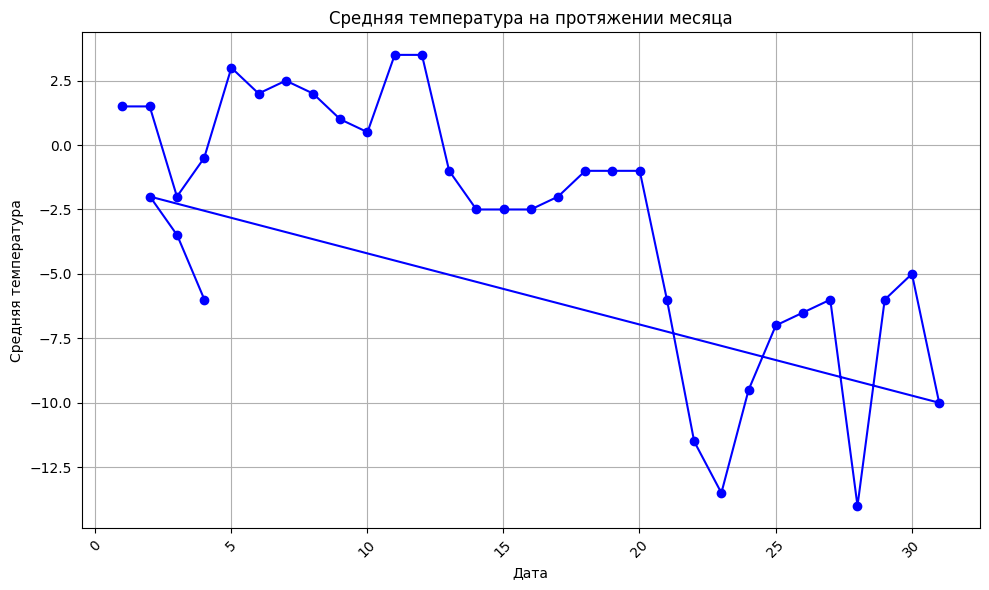

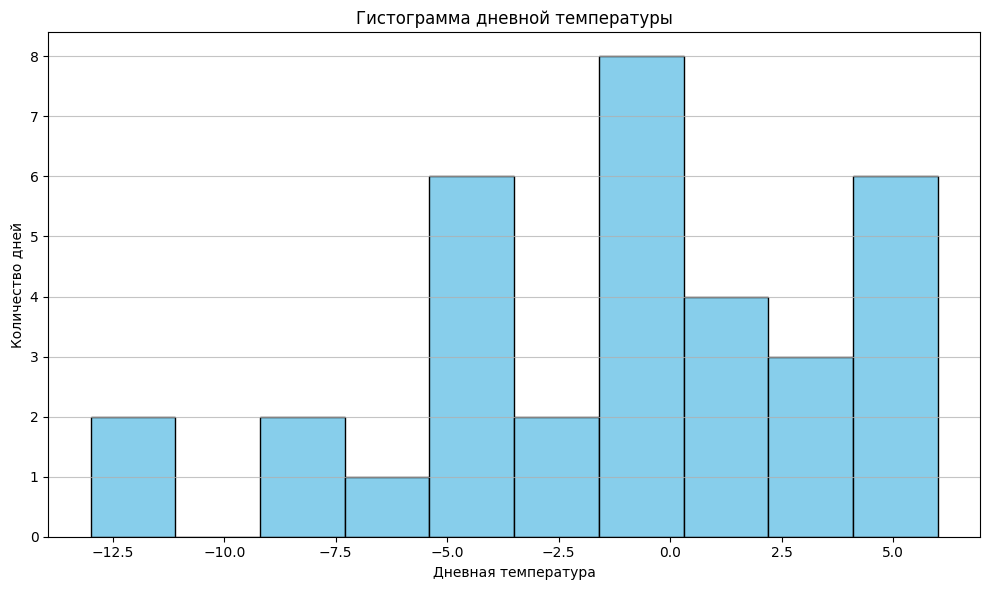

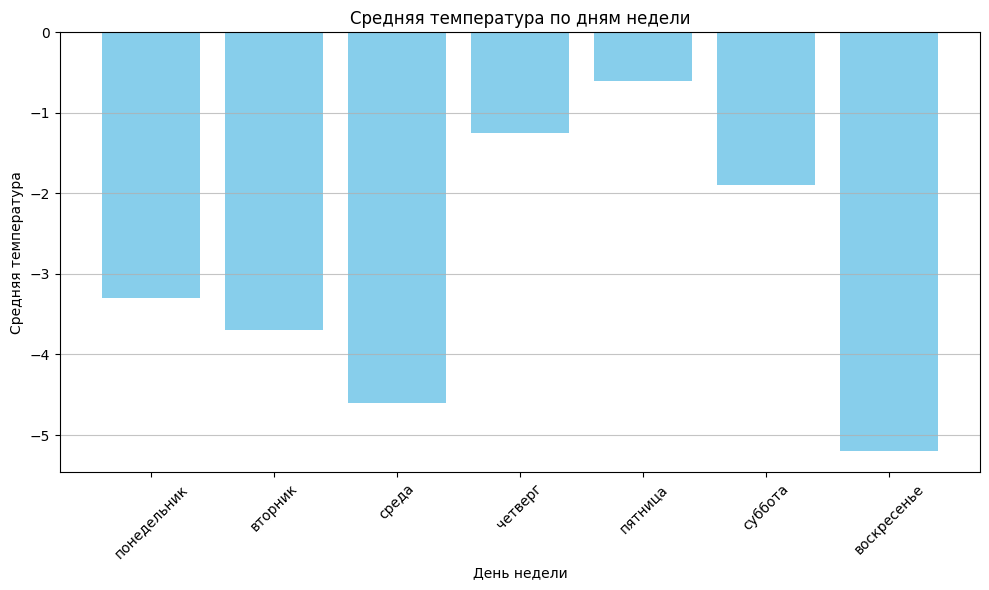

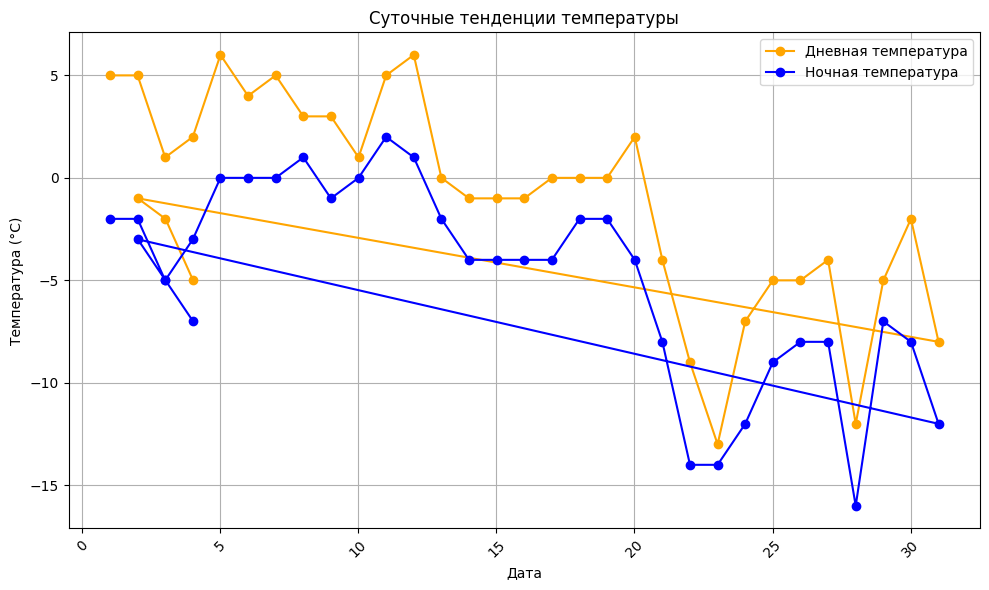

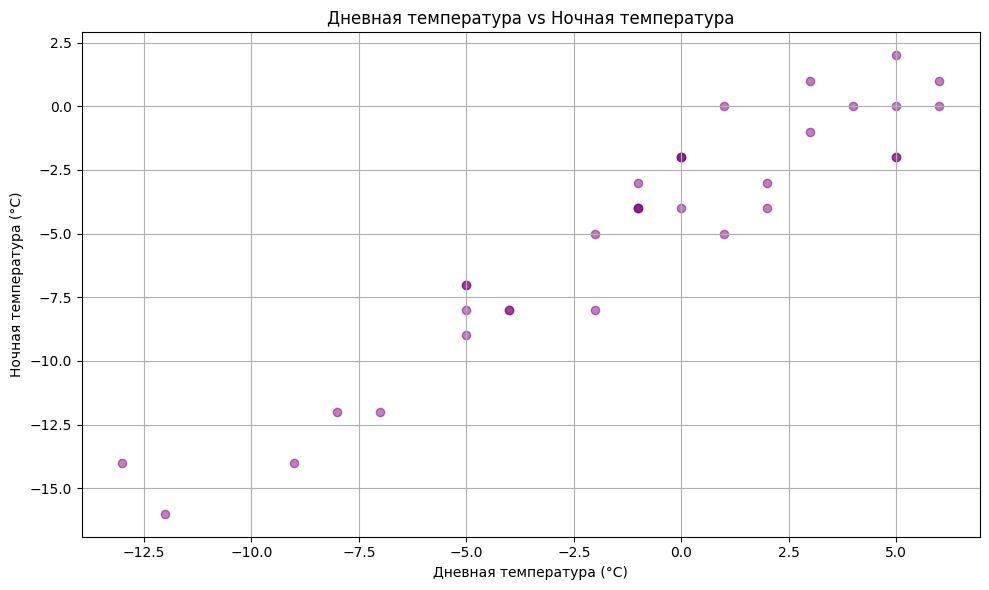

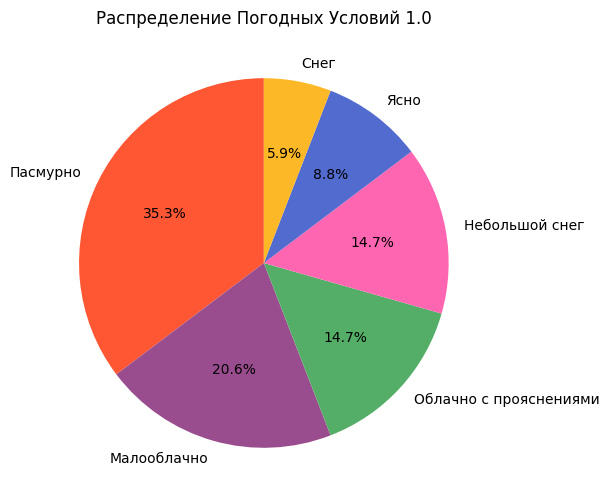

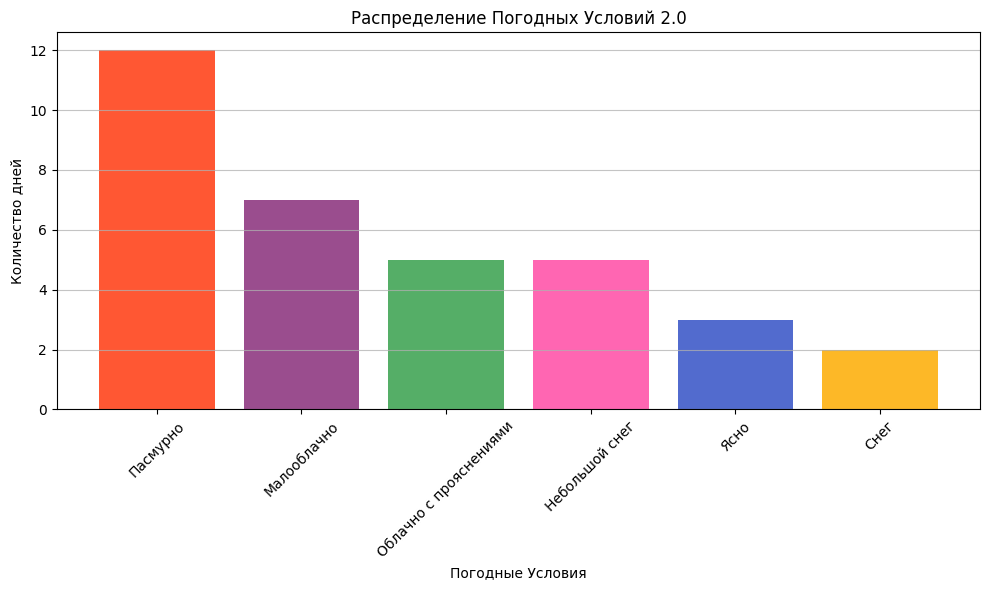

In [72]:
plt.figure(figsize=(10, 6))
plt.plot(df['Дата'], df['Средняя температура'], marker='o', linestyle='-', color='b')
plt.title('Средняя температура на протяжении месяца')
plt.xlabel('Дата')
plt.ylabel('Средняя температура')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
plt.hist(df['Дневная температура'], bins=10, color='skyblue', edgecolor='black')
plt.title('Гистограмма дневной температуры')
plt.xlabel('Дневная температура')
plt.ylabel('Количество дней')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()


days_order = ['понедельник', 'вторник', 'среда', 'четверг', 'пятница', 'суббота', 'воскресенье']
pivot_table = df.pivot_table(values='Средняя температура', index='День недели', aggfunc='mean').reindex(days_order)
plt.figure(figsize=(10, 6))
plt.bar(pivot_table.index, pivot_table['Средняя температура'], color='skyblue')
plt.title('Средняя температура по дням недели')
plt.xlabel('День недели')
plt.ylabel('Средняя температура')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(df['Дата'], df['Дневная температура'], marker='o', linestyle='-', color='orange', label='Дневная температура')
plt.plot(df['Дата'], df['Ночная температура'], marker='o', linestyle='-', color='blue', label='Ночная температура')
plt.title('Суточные тенденции температуры')
plt.xlabel('Дата')
plt.ylabel('Температура (°C)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(df['Дневная температура'], df['Ночная температура'], color='purple', alpha=0.5)
plt.title('Дневная температура vs Ночная температура')
plt.xlabel('Дневная температура (°C)')
plt.ylabel('Ночная температура (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()


weather_counts = df['Погодные условия'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(weather_counts, labels=weather_counts.index, autopct='%1.1f%%', startangle=90, colors=['#FF5733', '#9A4D8E', '#55AE67', '#FF66B2', '#526BCE', '#FDB827'])
plt.title('Распределение Погодных Условий 1.0')
plt.show()


weather_counts = df['Погодные условия'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(weather_counts.index, weather_counts, color=['#FF5733', '#9A4D8E', '#55AE67', '#FF66B2', '#526BCE', '#FDB827'])
plt.title('Распределение Погодных Условий 2.0')
plt.xlabel('Погодные Условия')
plt.ylabel('Количество дней')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()